In [28]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set_palette("deep")

In [30]:
from functions.load_data import *

# Load Data

In [6]:
df = load_diabetes_data()
display(df.head())
print(df.shape)

C:\Users\utgoy\Desktop\Topics_Project\code\functions\load_data.py:76: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'MISSING' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  diabetes.fillna("MISSING", inplace = True)


,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,had_high_cholesterol,class_of_worker,years_on_job,...,cancer,family_history_diabetes,ever_worked,more_than_one_job,kidney_condition,liver_condition,cant_afford_meds,skipped_meds,non_hispanic_race,hispanic
0,1_2_1,0,24,2,2,0,125,0,1.0,2.0,...,0,0,MISSING,2.0,2,2,2,MISSING,2,12
1,2_1_1,0,76,2,1,0,190,0,3.0,25.0,...,0,0,1.0,MISSING,2,2,2,MISSING,1,12
2,3_1_2,0,36,2,2,0,225,0,1.0,2.0,...,0,1,MISSING,2.0,2,2,1,2.0,1,3
3,5_1_1,0,35,1,2,0,240,0,1.0,1.0,...,0,1,MISSING,2.0,2,2,1,1.0,1,3
4,10_1_5,0,20,2,2,0,103,0,MISSING,MISSING,...,0,1,2.0,MISSING,2,2,2,MISSING,1,1


(32499, 23)


# Understanding Data

In [10]:
df.describe().round(2)

,diabetes,age,smoker,sex,coronary_heart_disease,weight,had_high_cholesterol,height,hypertension,heart_condition,cancer,family_history_diabetes,kidney_condition,liver_condition,cant_afford_meds,non_hispanic_race,hispanic
count,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00
mean,0.11,51.05,1.61,1.55,0.06,251.11,0.22,68.82,0.36,0.09,0.11,0.35,1.98,1.99,1.99,1.82,10.98
std,0.31,18.51,0.61,0.50,0.23,240.28,0.42,8.46,0.48,0.29,0.32,0.48,0.23,0.24,0.62,2.79,2.90
min,0.00,18.00,1.00,1.00,0.00,100.00,0.00,59.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00
25%,0.00,35.00,1.00,1.00,0.00,150.00,0.00,64.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,1.00,12.00
50%,0.00,52.00,2.00,2.00,0.00,176.00,0.00,67.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,1.00,12.00
75%,0.00,66.00,2.00,2.00,0.00,214.00,0.00,70.00,1.00,0.00,0.00,1.00,2.00,2.00,2.00,1.00,12.00
max,1.00,85.00,9.00,2.00,1.00,999.00,1.00,99.00,1.00,1.00,1.00,1.00,9.00,9.00,9.00,17.00,12.00


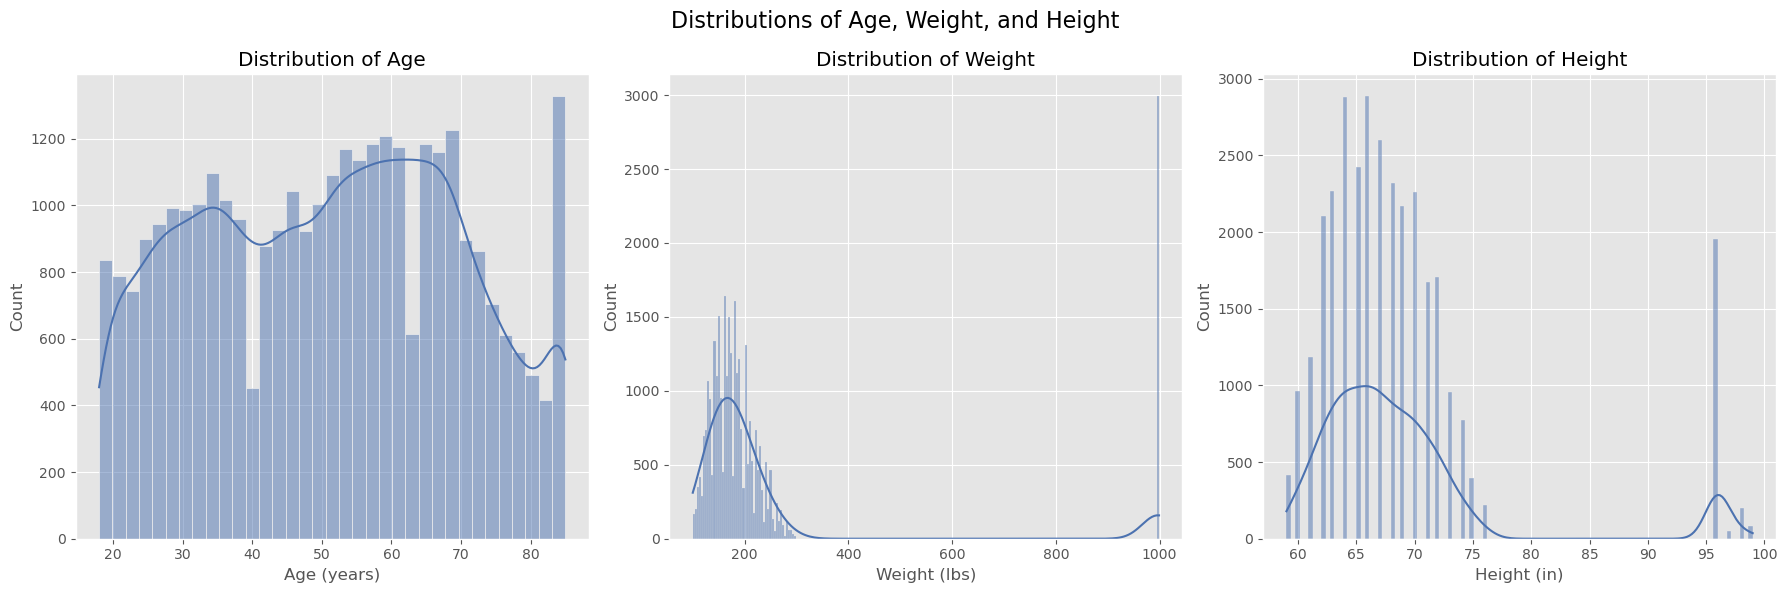

In [32]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distributions of Age, Weight, and Height', fontsize=16)

# Histogram for Age
sns.histplot(data=df, x='age', kde=True, ax=ax1)
ax1.set_title('Distribution of Age')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Count')

# Histogram for Weight
sns.histplot(data=df, x='weight', kde=True, ax=ax2)
ax2.set_title('Distribution of Weight')
ax2.set_xlabel('Weight (lbs)')
ax2.set_ylabel('Count')

# Histogram for Height
sns.histplot(data=df, x='height', kde=True, ax=ax3)
ax3.set_title('Distribution of Height')
ax3.set_xlabel('Height (in)')
ax3.set_ylabel('Count')

plt.tight_layout()
plt.show()

#not much clarity for 85+
#for weight at or above 300 lbs, fill with NA (not expected from file layout reference)
#for height at or above 77 in, fll with NA (not expected from file layout reference)

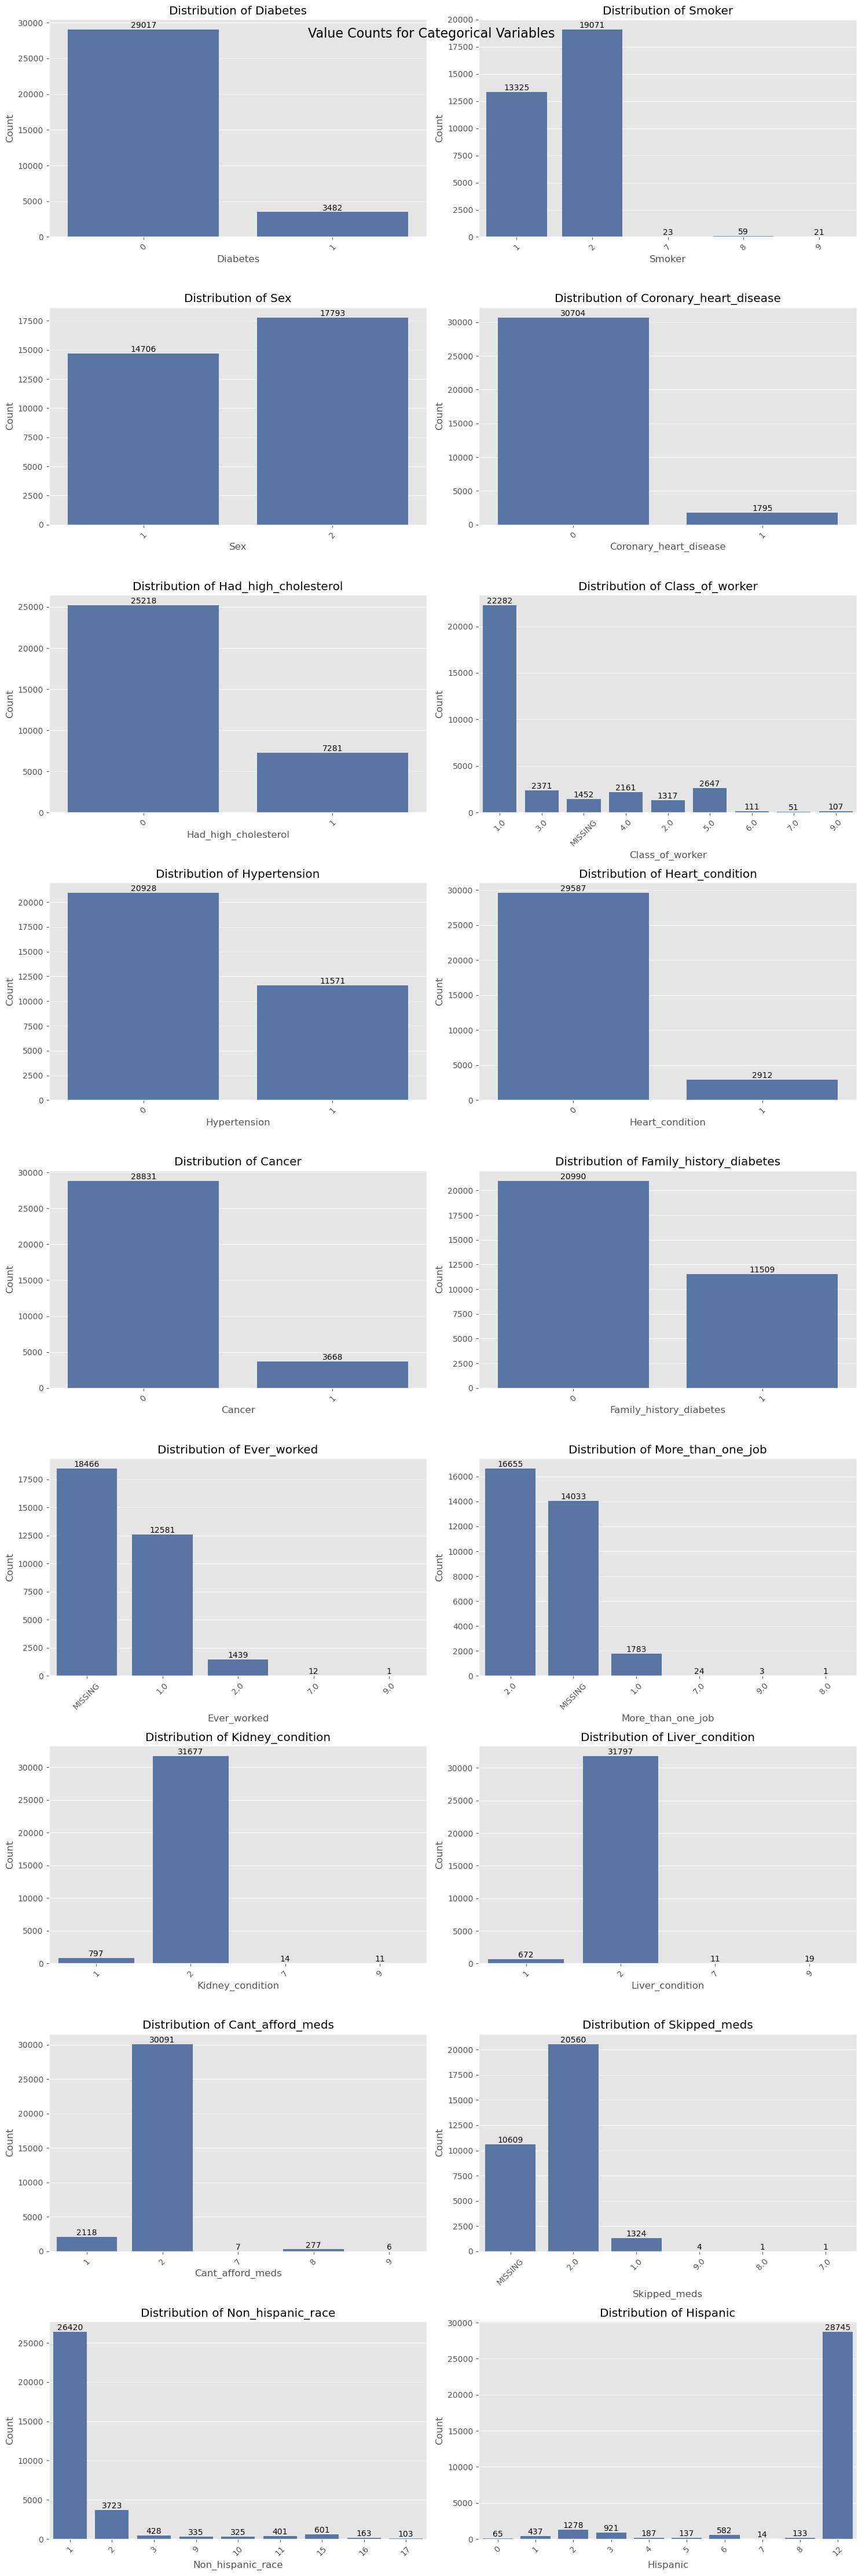

In [49]:
columns_to_plot = ["diabetes",
                   "smoker",
                   "sex",
                   "coronary_heart_disease",
                   "had_high_cholesterol",
                   "class_of_worker",
                   "hypertension",
                   "heart_condition",
                   "cancer",
                   "family_history_diabetes",
                   "ever_worked",
                   "more_than_one_job",
                   "kidney_condition",
                   "liver_condition",
                   "cant_afford_meds",
                   "skipped_meds",
                   "non_hispanic_race",
                   "hispanic"]

# Create subplots based on the number of columns to plot
n_cols = 2
n_rows = (len(columns_to_plot) + 1) // 2  # Round up to the nearest integer
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Value Counts for Categorical Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create value count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels if they're too long
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 5), textcoords='offset points')

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#refused, ascertain, and don't know can be pooled as 'other'

In [138]:
df_clean = df.copy()

#Grouping small columns together
columns_to_merge = {
    'smoker': [7, 8, 9],
    'class_of_worker': [7, 8, 9],
    'more_than_one_job': [7, 8, 9],
    'kidney_condition': [7, 8, 9],
    'liver_condition': [7, 8, 9],
    'cant_afford_meds': [7, 8, 9],
    'skipped_meds': [7, 8, 9],
    'ever_worked': [7, 8, 9],
}

for column, values in columns_to_merge.items():
    df_clean[column] = df_clean[column].replace(values, 'OTHER')

#creating meaninful names for the column vales

mapping_dict = {
    
"diabetes":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"smoker":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"sex":{1:'MALE', 2:'FEMALE','OTHER':'OTHER', 'MISSING':'MISSING'},
"coronary_heart_disease":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"had_high_cholesterol":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"hypertension":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"heart_condition":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"cancer":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"family_history_diabetes":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"ever_worked":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"more_than_one_job":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"kidney_condition":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"liver_condition":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"cant_afford_meds":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"skipped_meds":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},

"non_hispanic_race":{1:'White',2: 'Black/African American',3:'Indian (American), Alaska Native',9: 'Asian Indian' , 
                     10: 'Chinese' ,11 :'Filipino' ,15 :'Other Asian',16 :'Primary race not releasable' ,
                     17 :'Multiple race, no primary race selected','OTHER':'OTHER', 'MISSING':'MISSING'},

"hispanic":{0: 'Multiple Hispanic',1 :'Puerto Rico',2: 'Mexican',3 :'Mexican-American',4 :'Cuban/Cuban American',
            5: 'Dominican (Republic)',6: 'Central or South American',7: 'Other Latin American, not specified',8: 'Other Spanish',
            9: 'Hispanic/Latino/Spanish, non-specific',10: 'Hispanic/Latino/Spanish, type refused',
            11: 'Hispanic/Latino/Spanish, type not ascertained', 12: 'Not Hispanic/Spanish origin',
            'OTHER':'OTHER', 'MISSING':'MISSING',},

'class_of_worker':{1:'PRIVATE COMPANY', 2:'FEDERAL GOVERNMENT', 3:'STATE GOVERNMENT',
                    4:'LOCAL GOVERNMENT', 5:'SELF-EMPLOYED', 6:'IN FAMLY-OWED WITHOUT PAY', 
                    7:'Refused',8:'Not ascertained',9:"Don't know",'OTHER':'OTHER', 'MISSING':'MISSING',},
    
}

In [140]:
for key, value in mapping_dict.items():
    df_clean[key] = df_clean[key].map(value)

In [142]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32499 entries, 0 to 32498
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   house_family_person_id   32499 non-null  object
 1   diabetes                 32499 non-null  object
 2   age                      32499 non-null  int64 
 3   smoker                   32499 non-null  object
 4   sex                      32499 non-null  object
 5   coronary_heart_disease   32499 non-null  object
 6   weight                   32499 non-null  int64 
 7   had_high_cholesterol     32499 non-null  object
 8   class_of_worker          32499 non-null  object
 9   years_on_job             32499 non-null  object
 10  height                   32499 non-null  int64 
 11  hypertension             32499 non-null  object
 12  heart_condition          32499 non-null  object
 13  cancer                   32499 non-null  object
 14  family_history_diabetes  32499 non-nul

In [150]:
# df_clean.groupby(['hispanic'])['non_hispanic_race'].unique().reset_index()
#every hispanic subgroup has a combintion of every race except for Asian Indian

In [ ]:
# df_clean.groupby(['years_on_job','smoker']).agg({'house_family_person_id':'count'}).reset_index().tail(20)
#every hispanic subgroup has a combintion of every race except for Asian Indian

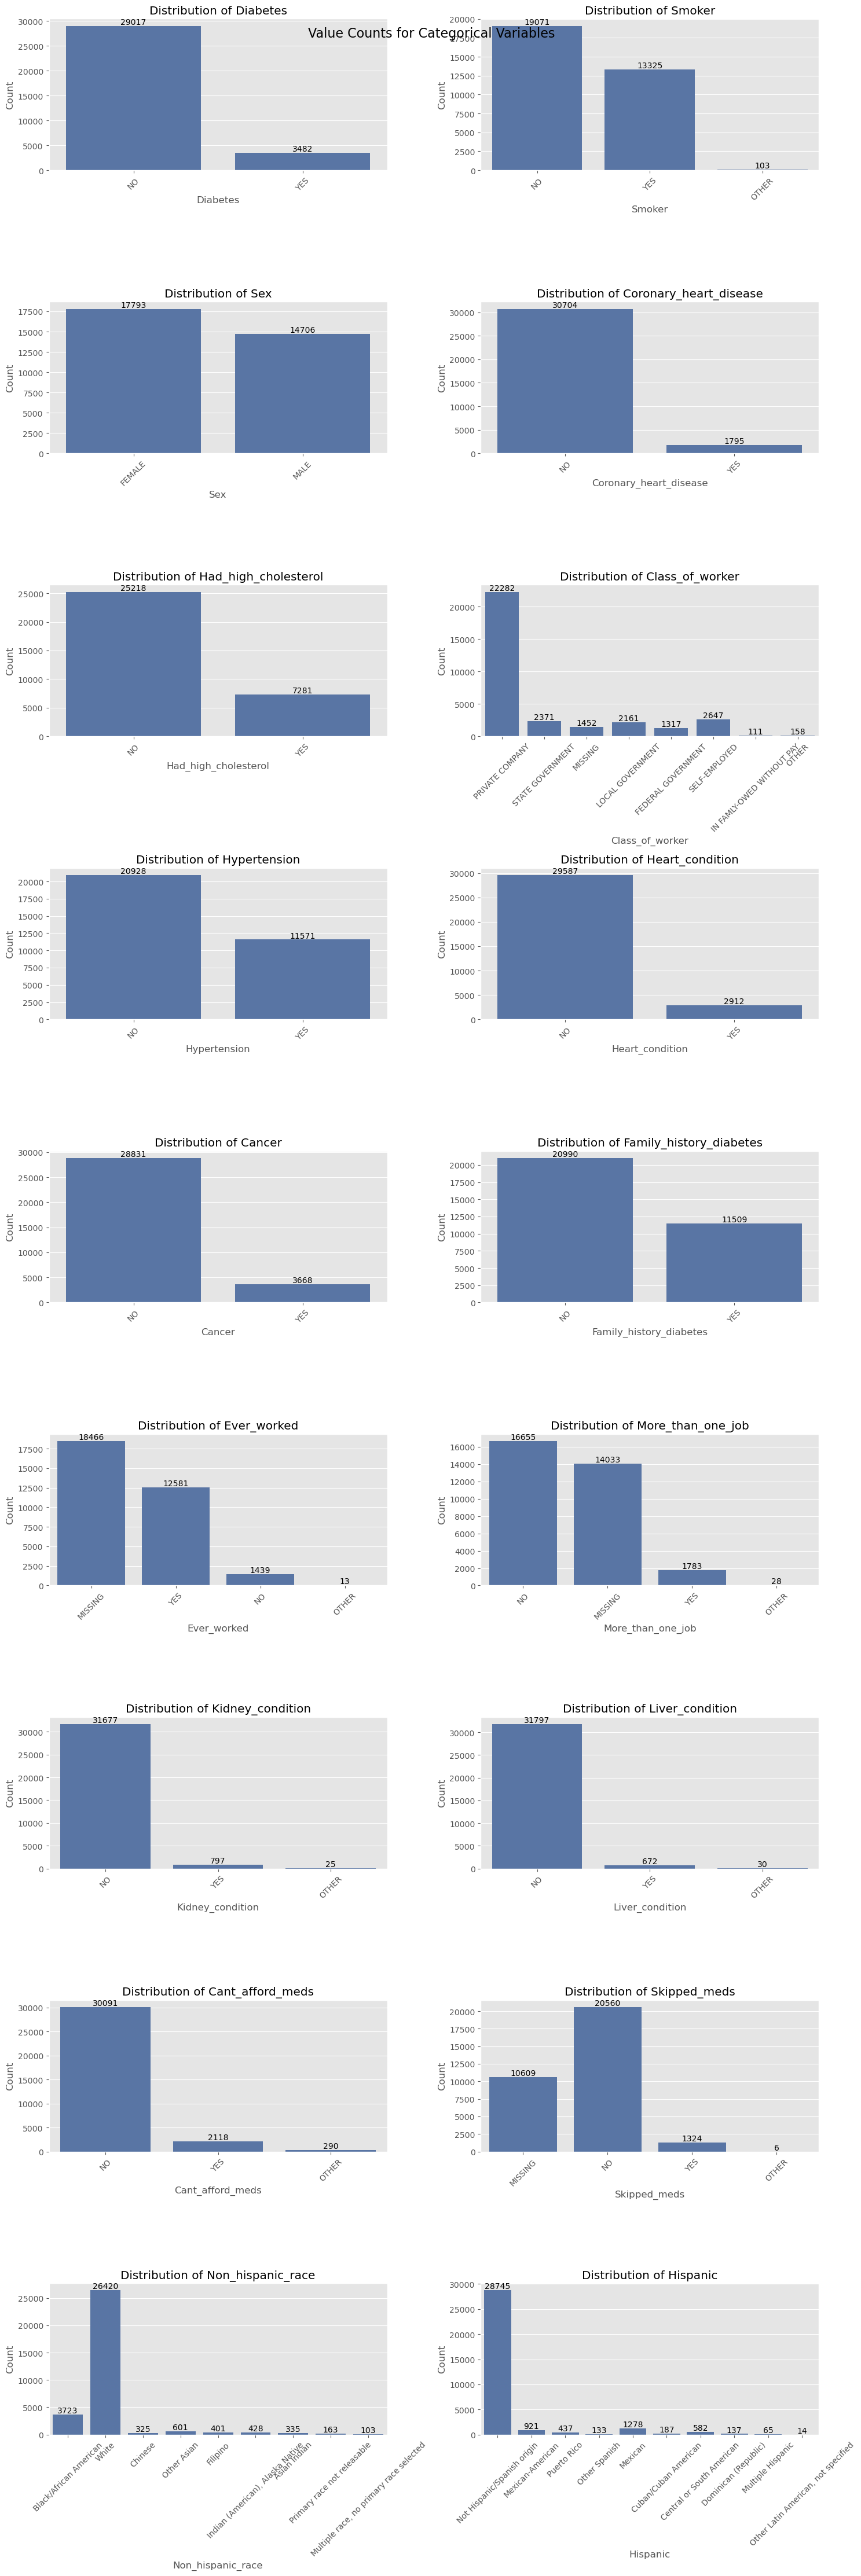

In [152]:
n_cols = 2
n_rows = (len(columns_to_plot) + 1) // 2  # Round up to the nearest integer
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Value Counts for Categorical Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create value count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df_clean, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels if they're too long
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 5), textcoords='offset points')

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

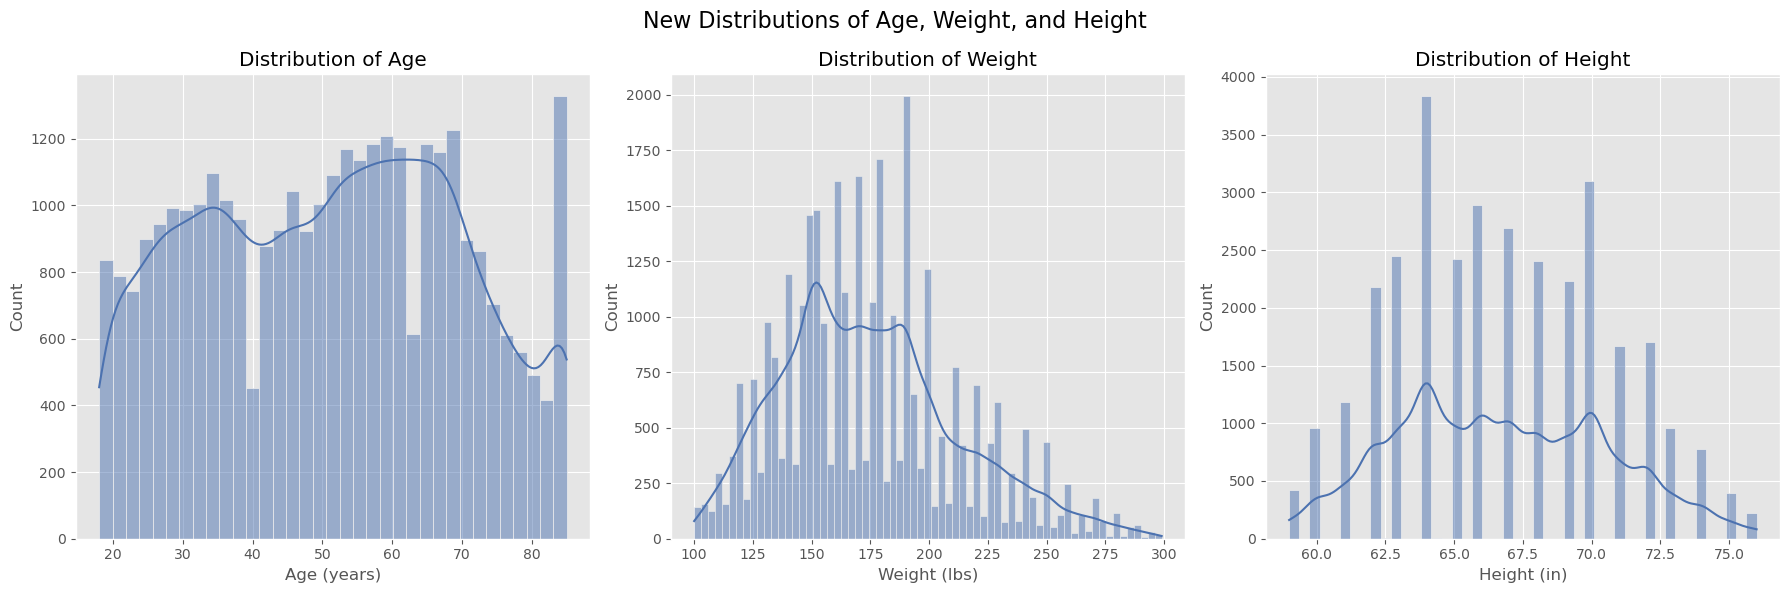

In [156]:
#Nan for weight and height
df_clean.loc[df_clean['weight'] >= 300, 'weight'] = np.nan
df_clean.loc[df_clean['height'] >= 77, 'height'] = np.nan

#imputing Nan values weight and height
df_clean['weight'] = df_clean.groupby(['sex', 'non_hispanic_race', 'hispanic'])['weight'].transform(lambda x: x.fillna(x.median()))
df_clean['height'] = df_clean.groupby(['sex', 'non_hispanic_race', 'hispanic'])['height'].transform(lambda x: x.fillna(x.median()))

#stratified median for imputation based on 'sex', 'non_hispanic_race', 'hispanic' for more accurate representation of skewed values


# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('New Distributions of Age, Weight, and Height', fontsize=16)

# Histogram for Age
sns.histplot(data=df_clean, x='age', kde=True, ax=ax1)
ax1.set_title('Distribution of Age')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Count')

# Histogram for Weight
sns.histplot(data=df_clean, x='weight', kde=True, ax=ax2)
ax2.set_title('Distribution of Weight')
ax2.set_xlabel('Weight (lbs)')
ax2.set_ylabel('Count')

# Histogram for Height
sns.histplot(data=df_clean, x='height', kde=True, ax=ax3)
ax3.set_title('Distribution of Height')
ax3.set_xlabel('Height (in)')
ax3.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [158]:
# New BMI
df_clean['bmi'] = df_clean['weight'] / (df_clean['height'] ** 2)*703
df_clean['bmi'] = df_clean['bmi'].round(2)

display(df_clean.head())

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,had_high_cholesterol,class_of_worker,years_on_job,...,family_history_diabetes,ever_worked,more_than_one_job,kidney_condition,liver_condition,cant_afford_meds,skipped_meds,non_hispanic_race,hispanic,bmi
0,1_2_1,NO,24,NO,FEMALE,NO,125.0,NO,PRIVATE COMPANY,2.0,...,NO,MISSING,NO,NO,NO,NO,MISSING,Black/African American,Not Hispanic/Spanish origin,20.17
1,2_1_1,NO,76,NO,MALE,NO,190.0,NO,STATE GOVERNMENT,25.0,...,NO,YES,MISSING,NO,NO,NO,MISSING,White,Not Hispanic/Spanish origin,27.26
2,3_1_2,NO,36,NO,FEMALE,NO,225.0,NO,PRIVATE COMPANY,2.0,...,YES,MISSING,NO,NO,NO,YES,NO,White,Mexican-American,38.62
3,5_1_1,NO,35,YES,FEMALE,NO,240.0,NO,PRIVATE COMPANY,1.0,...,YES,MISSING,NO,NO,NO,YES,YES,White,Mexican-American,39.93
4,10_1_5,NO,20,NO,FEMALE,NO,103.0,NO,MISSING,MISSING,...,YES,NO,MISSING,NO,NO,NO,MISSING,White,Puerto Rico,18.84
